<a href="https://colab.research.google.com/github/ivalozkaMIIGAiK/image_processing/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%961_%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

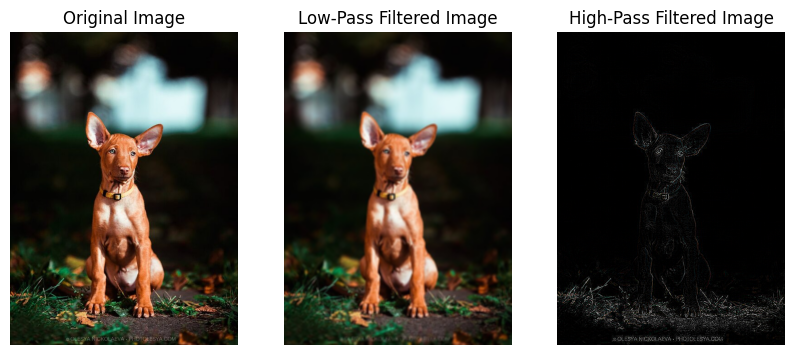

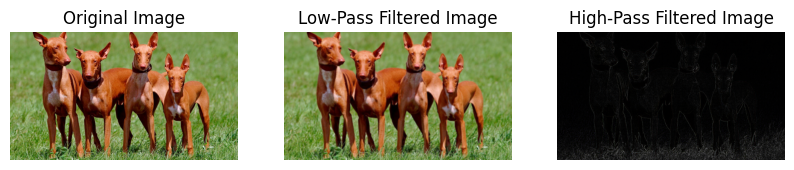

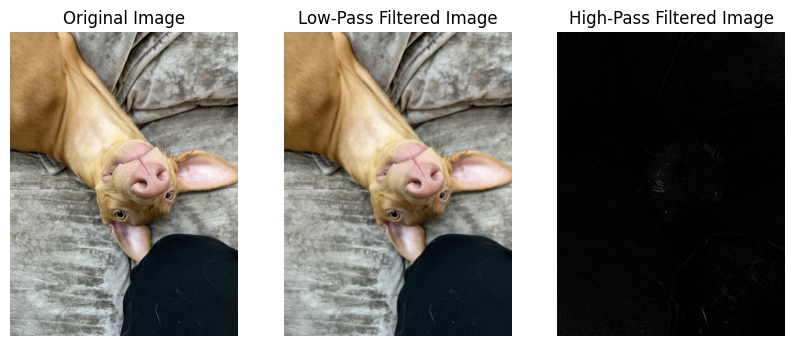

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# подготовка фильтра низких част
kernel1 = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]])

# подготовка фильтра высоких част
kernel2 = np.array([[0.0, -1.0, 0.0],
                    [-1.0, 4.0, -1.0],
                    [0.0, -1.0, 0.0]])

# нормализация
kernel2 = kernel2 / (np.sum(kernel2) if np.sum(kernel2) != 0 else 1)
kernel1 = kernel1 / (np.sum(kernel1) if np.sum(kernel1) != 0 else 1)

for i in range(1, 4):
    # чтение изображения
    img_src = cv2.imread(f'/content/sample_data/images/before/{i}.jpg')
    # применение фильтра
    img_rst1 = cv2.filter2D(img_src, -1, kernel1)
    img_rst2 = cv2.filter2D(img_src, -1, kernel2)

    # конвертируем изображение из BGR в RGB для корректного отображения в matplotlib
    img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
    img_rst1 = cv2.cvtColor(img_rst1, cv2.COLOR_BGR2RGB)
    img_rst2 = cv2.cvtColor(img_rst2, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(img_src)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img_rst1)
    plt.title('Low-Pass Filtered Image')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img_rst2)
    plt.title('High-Pass Filtered Image')
    plt.axis('off')
    plt.show()
    print()

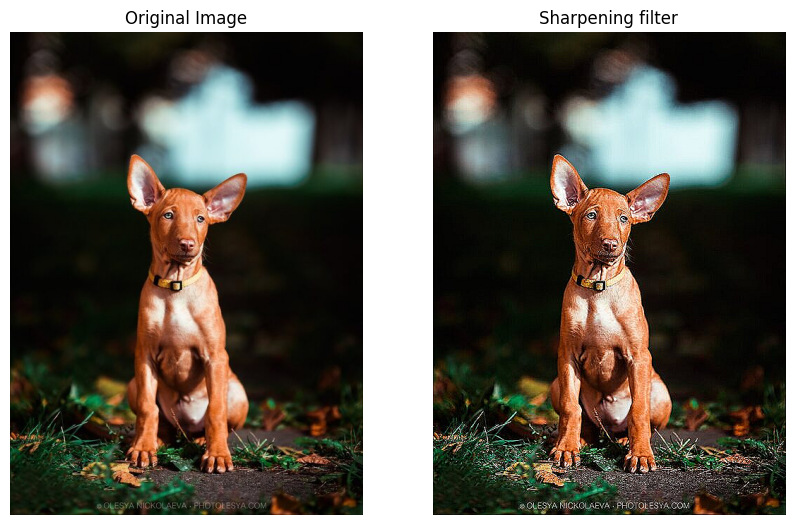

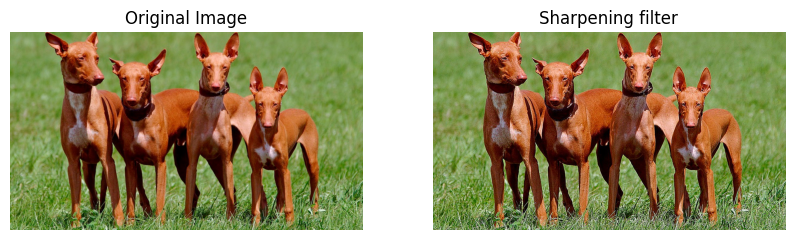

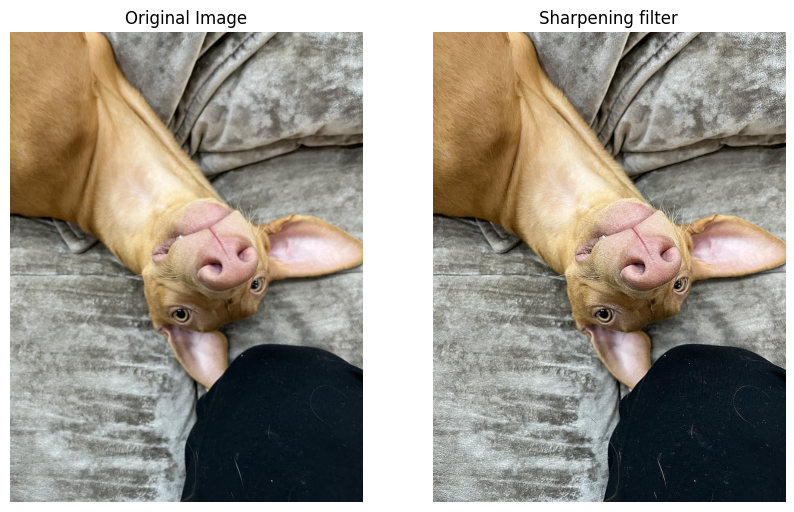

In [11]:
#фильтр резкости
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
kernel_sharpen = kernel_sharpen / (np.sum(kernel_sharpen) if np.sum(kernel_sharpen) != 0 else 1)

for i in range(1, 4):
    img_src = cv2.imread(f'/content/sample_data/images/before/{i}.jpg')
    img_rst = cv2.filter2D(img_src, -1, kernel_sharpen)
    cv2.imwrite(f'/content/sample_data/images/after/CustomFilter{i}.jpg', img_rst)
    img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
    img_rst = cv2.cvtColor(img_rst, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img_src)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img_rst)
    plt.title('Sharpening filter')
    plt.axis('off')
    plt.show()
    print()